# Visualize

## Import

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import os
from datetime import datetime
from matplotlib import patheffects
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import plotly.graph_objects as go


In [17]:
# Pfad
TEMPLATE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "_templates"))

In [18]:
# Daten einlesen
wahlen_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wahlen.pickle"))
wordcount_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wordcount.pickle"))

In [19]:
# Liste der Parteifarben
parteifarben = {'cdu': 'black', 'spd': 'red', 'grüne': 'green','grünen': 'green',
                'fdp': '#DAA520', 'linke': 'purple', 'afd': 'blue'}

## Inspect

In [20]:
wordcount_df.head() 

,date,word,paper,count,month,quarter,week
0,2021-04-01,afd,faz,2,2021-04,2021Q2,2021-03-29
1,2021-04-01,afd,tagesspiegel,1,2021-04,2021Q2,2021-03-29
2,2021-04-01,afd,uebermedien,5,2021-04,2021Q2,2021-03-29
3,2021-04-01,cdu,berliner,1,2021-04,2021Q2,2021-03-29
4,2021-04-01,cdu,dlf,6,2021-04,2021Q2,2021-03-29


In [21]:
wahlen_df.head()

,date,cdu,spd,grüne,fdp,linke,afd,bsw,quarter,month,week
0,2021-04-16,31,14,21,9,7,11,0,2021Q2,2021-04,2021-04-12
1,2021-05-07,25,14,26,10,7,11,0,2021Q2,2021-05,2021-05-03
2,2021-05-21,24,14,25,11,7,11,0,2021Q2,2021-05,2021-05-17
3,2021-06-10,28,15,22,10,7,11,0,2021Q2,2021-06,2021-06-07
4,2021-06-25,29,14,22,10,7,10,0,2021Q2,2021-06,2021-06-21


In [22]:
# Spalte "grüne" in "grünen" umbenennen
wahlen_df = wahlen_df.rename(columns={"grüne": "grünen"})

## Visualisierung

Interaktve Grafik mit dem Wordcount und Politbarometer Daten

In [23]:
# Farben für die Parteien definieren
parteifarben = {
    "afd": "blue",
    "cdu": "black",
    "grünen": "green",
    "spd": "red",
}

# Daten für Wordcount vorbereiten
df_grouped_wordcount = wordcount_df.groupby(["month", "word"])["count"].sum().reset_index()

# Daten für Politbarometer vorbereiten
df_grouped_parties = wahlen_df.groupby("month").first().reset_index()

# Interaktive Figur erstellen
fig = go.Figure()

# Wordcount-Daten hinzufügen (linke Y-Achse)
for word in ["afd", "cdu", "grünen", "spd"]:
    word_data = df_grouped_wordcount[df_grouped_wordcount["word"] == word]
    fig.add_trace(
        go.Scatter(
            x=word_data["month"],
            y=word_data["count"],
            mode="lines",
            name=f"Wordcount: {word.upper()}",
            line=dict(color=parteifarben.get(word, "gray")),
            yaxis="y1",  # Linke Y-Achse
            hoverinfo="x+y+name"
        )
    )

# Politbarometer-Daten hinzufügen (rechte Y-Achse)
for column in ["afd", "cdu", "grünen", "spd"]:
    fig.add_trace(
        go.Scatter(
            x=df_grouped_parties["month"],
            y=df_grouped_parties[column],
            mode="lines",
            name=f"Politbarometer: {column.upper()}",
            line=dict(color=parteifarben.get(column, "gray"), dash="dash"),
            yaxis="y2",  # Rechte Y-Achse
            hoverinfo="x+y+name"
        )
    )

# Layout der Grafik definieren
fig.update_layout(
    
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(
        title="Wordcount",
        side="left",
        showgrid=True,
    ),
    yaxis2=dict(
        title="Politbarometer (%)",
        side="right",
        overlaying="y",
        showgrid=False,
    ),
    legend=dict(
        title="Legende",
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=1
    ),
    template="plotly_white",
    height=600,
    width=1000,
)

# Interaktive Figur anzeigen
fig.show()

# Optional: Grafik als HTML speichern
fig.write_html("interaktive_visualisierung.html")

Die kumulierten Wordcounts ueber die Zeit

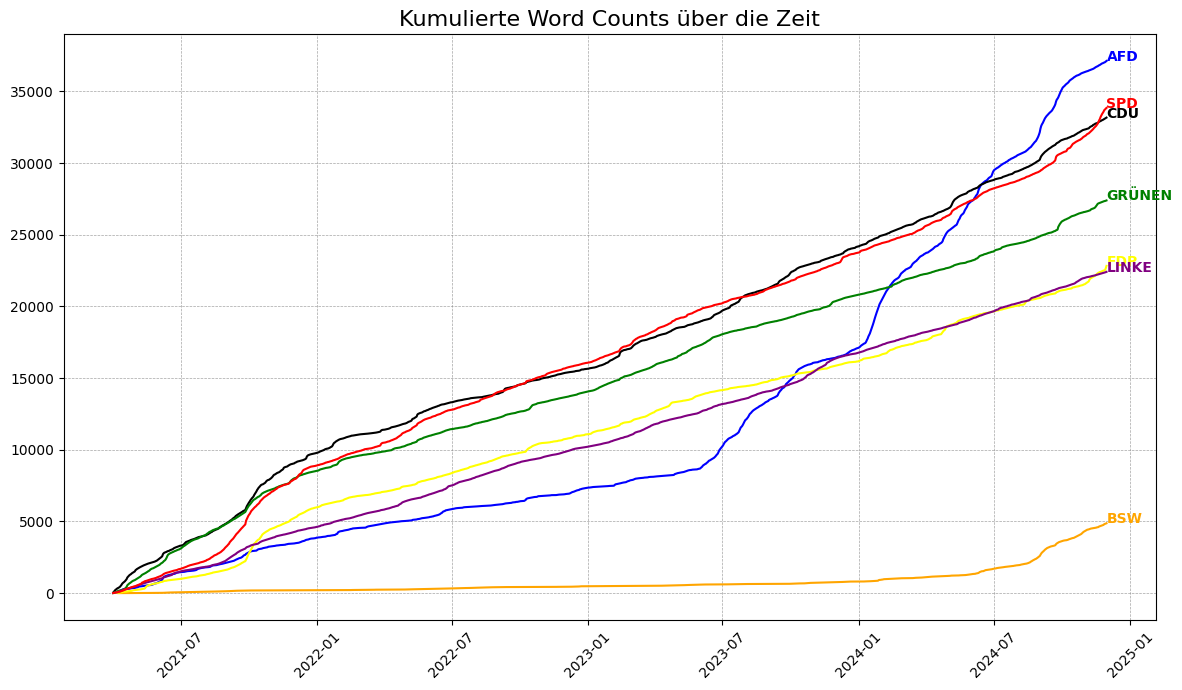

In [24]:
# Datum in ein datetime-Format umwandeln
wordcount_df["date"] = pd.to_datetime(wordcount_df["date"])

# Farben pro Partei definieren
party_colors = {
    "cdu": "black",
    "grünen": "green",
    "spd": "red",
    "fdp": "yellow",
    "linke": "purple",
    "afd": "blue",
    "bsw": "orange"
}

# Kumulierten Wordcount pro Partei berechnen
cumulative_data = wordcount_df.groupby(["word", "date"])["count"].sum().groupby(level=0).cumsum().reset_index()

# Plot erstellen
plt.figure(figsize=(12, 7))
for word, group in cumulative_data.groupby("word"):
    plt.plot(
        group["date"], 
        group["count"], 
        label=word.upper(), 
        color=party_colors.get(word, "gray"), 
        linewidth=1.5
    )
    # Parteiname am Ende der Linie anzeigen
    plt.text(
        group["date"].iloc[-1],  # Letztes Datum
        group["count"].iloc[-1],  # Letzter Wert
        word.upper(),  # Parteiname
        color=party_colors.get(word, "gray"),
        fontsize=10,
        fontweight="bold"
    )

# Titel und Achsenbeschriftungen
plt.title("Kumulierte Word Counts über die Zeit", fontsize=16)


# Achsenformatierung
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Rasterlinien hinzufügen
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()


Wordcount 2024 mit den 4 groessten Parteien und Events

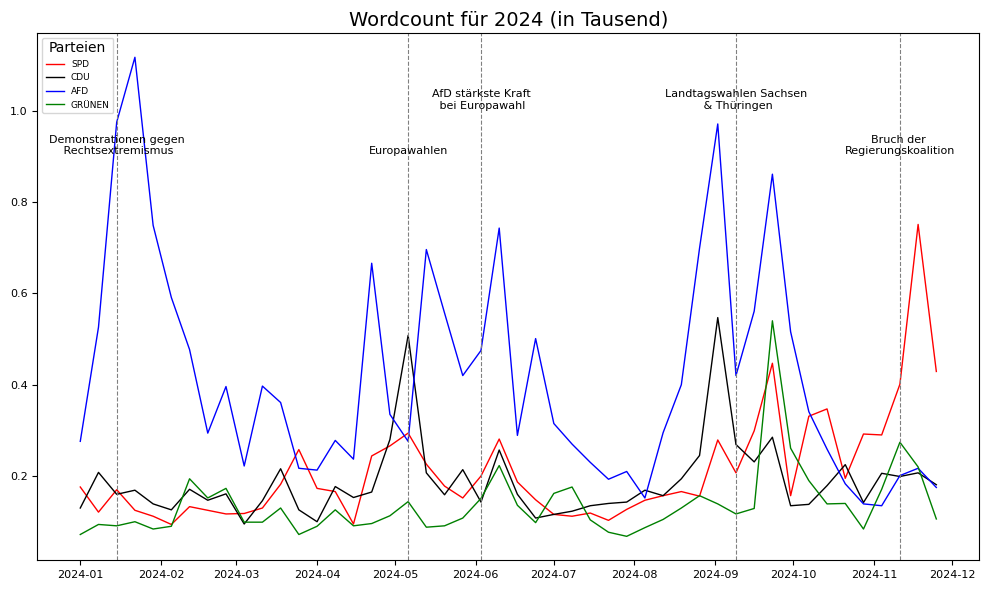

In [25]:
# Relevante Parteienfarben
parteifarben = {
    "spd": "red",
    "cdu": "black",
    "afd": "blue",
    "grünen": "green",
}

# Daten filtern: nur das Jahr 2024
wordcount_2024 = wordcount_df[wordcount_df["date"].dt.year == 2024]

# Daten nach Woche und Partei gruppieren
df_grouped_wordcount = wordcount_2024.groupby(["week", "word"])["count"].sum().reset_index()

# Events für 2024
events = [
    {"date": "2024-01-15", "label": "Demonstrationen gegen\n Rechtsextremismus", "y_position": 900},
    {"date": "2024-05-06", "label": "Europawahlen", "y_position": 900},
    {"date": "2024-06-03", "label": "AfD stärkste Kraft\n bei Europawahl", "y_position": 1000},
    {"date": "2024-09-09", "label": "Landtagswahlen Sachsen\n & Thüringen", "y_position": 1000},
    {"date": "2024-11-11", "label": "Bruch der \nRegierungskoalition", "y_position": 900},
]

# Plot erstellen
plt.figure(figsize=(10, 6))
ax1 = plt.gca()

# Plot für Wordcount-Daten (pro Woche)
for word in ["spd", "cdu", "afd", "grünen"]:
    temp_df = df_grouped_wordcount[df_grouped_wordcount["word"] == word]
    ax1.plot(
        temp_df["week"],
        temp_df["count"],
        label=word.upper(),
        color=parteifarben.get(word, "grey"),
        linewidth=1,
    )

# Achsentitel und Skalierung


ax1.tick_params(axis="y", labelsize=8, labelcolor="black")
ax1.tick_params(axis="x", labelsize=8)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x * 0.001:.1f}"))

# Ereignisse markieren
for event in events:
    plt.axvline(pd.to_datetime(event["date"]), color="grey", linestyle="--", linewidth=0.8)
    plt.text(
        pd.to_datetime(event["date"]),
        event["y_position"],
        event["label"],
        rotation=0,  # Waagerecht (0 Grad)
        fontsize=8,
        va="bottom",
        ha="center",
    )

# Legende
plt.legend(title="Parteien", loc="upper left", fontsize=6.5)
plt.title("Wordcount für 2024 (in Tausend)", fontsize=14)
plt.tight_layout()

# Plot anzeigen
plt.show()
